<a href="https://colab.research.google.com/github/ndtuan10/Seminar_DataMining_CS313.L11.KHCL/blob/main/Do_an_Data_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BÁO CÁO ĐỒ ÁN CUỐI KÌ**

**Môn : Khai thác dữ liệu và ứng dụng - CS313.L11.KHCL**

Giáo viên : TS.Nguyễn Thị Anh Thư

Thành viên :

  + Ngô Đức Tuấn (18520186)  
  + Trần Ngọc Chính (18520534)
  + Nguyễn Anh Khoa (18520922)
  + Bùi Minh Lý (18521075)
  + Bùi Quang Minh (18521087)
  + Lê Anh Minh (18521098)


# **I. TỔNG QUAN DỮ LIỆU**
## Tên đề tài: Income Dataset
- Nguồn dữ liệu: Kaggle
- Link dữ liệu: https://www.kaggle.com/mastmustu/income
- Mục tiêu: Xây dựng bài toán phân lớp một biến nhị phân dự đoán tiền lương của một người có được từ ***$50k*** trở lên không dựa trên những dữ liệu có sẵn. 

- Input: Tập dữ liệu cung cấp 14 thuộc tính dự đoán khác nhau, ví dụ education, employment status, marital status,…

- Output: Cho biết tiền lương của một người có được từ ***$50k*** trở lên không, nếu được thì cho ra kết quả ***“income_>50K” = 1***, ngược lại nếu không được cho ra kết quả ***“income_>50K” = 0***.

In [385]:
from google.colab import drive
drive.mount('/content/drive')                                                                                                                                                                                                                                                              

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **II. ĐỌC-HIỂU DỮ LIỆU**

In [386]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.base import BaseEstimator, TransformerMixin

%matplotlib inline

In [387]:
path = '/content/drive/My Drive/CS313.L11.KHCL - Data Mining/data/income.csv'
data = pd.read_csv(path)
data.shape #Số dòng, cột

(43957, 15)

In [388]:
#Tổng quan dữ liệu
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43952,52,Private,68982,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,1
43953,19,Private,116562,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,40,United-States,0
43954,30,Private,197947,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,58,United-States,0
43955,46,Private,97883,Bachelors,13,Never-married,Sales,Not-in-family,White,Female,0,0,35,United-States,0


## **1. Kiểm tra phân phối biến kết quả**

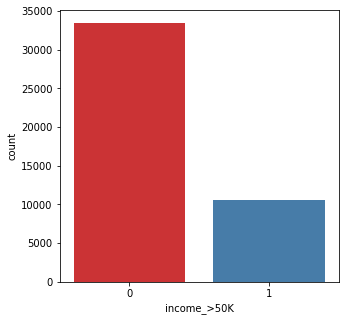

1 :  23.927929567531905 %
0:   76.0720704324681 %
So luong


0    33439
1    10518
Name: income_>50K, dtype: int64

In [389]:
#Kiểm tra dữ liệu cân bằng
#Tần số xuất hiện của dữ liệu biến kết quả
f, ax = plt.subplots(figsize=(5, 5))
ax = sns.countplot(x="income_>50K", data=data, palette="Set1")
plt.show()

print("1 : ",(sum(data['income_>50K'] == 1) / data.shape[0])*100 , "%")
print("0:  ",(sum(data['income_>50K'] == 0) / data.shape[0])*100, "%")

# Số lượng thu nhập > 50K và < 50K
print('So luong')
data['income_>50K'].value_counts()

***- Nhận xét***: Ta thấy lượng phân bố các giá trị 0 và 1 ( <= 50K, >50K) có sự chênh lệch rất lớn. Cụ thể là giá trị 0 gấp khoảng 3 lần giá trị 1 nên ta cần cân bằng dữ liệu trước khi đưa vào mô hình thực nghiệm

## **2. Kiểm tra tổng quát các biến dữ liệu**

In [390]:
# Kiểu dữ liệu của các cột
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43957 entries, 0 to 43956
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              43957 non-null  int64 
 1   workclass        41459 non-null  object
 2   fnlwgt           43957 non-null  int64 
 3   education        43957 non-null  object
 4   educational-num  43957 non-null  int64 
 5   marital-status   43957 non-null  object
 6   occupation       41451 non-null  object
 7   relationship     43957 non-null  object
 8   race             43957 non-null  object
 9   gender           43957 non-null  object
 10  capital-gain     43957 non-null  int64 
 11  capital-loss     43957 non-null  int64 
 12  hours-per-week   43957 non-null  int64 
 13  native-country   43194 non-null  object
 14  income_>50K      43957 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.0+ MB


***- Nhận xét***: 
- Có 7 kiểu dữ liệu thuộc dạng số, 8 kiểu dữ liệu thuộc dạng object
- Một số biến dữ liệu còn thiếu giá trị như "workclass", "occupation",...


In [391]:
# In ra các thuộc tính có kiểu nominal
nom_columns = [ col for col in list(data.columns) if data[col].dtype =='object']
nom_columns

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native-country']

In [392]:
# In ra các thuộc tính có kiểu numeric
num_columns = [ col for col in list(data.columns) if data[col].dtype =='int64']
num_columns

['age',
 'fnlwgt',
 'educational-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'income_>50K']

## **3. Xem thống kê của dữ liệu, tìm hiểu về dữ liệu**

- Với dữ liệu số (numeric), xem các giá trị trung bình, giá trị phương sai.

In [393]:
 # mean = giá trị trung bình, std = độ lệch chuẩn = căn bậc hai của phương sai.
 data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income_>50K
count,43957.000000,4.395700e+04,43957.000000,43957.000000,43957.000000,43957.000000,43957.000000
mean,38.617149,1.896730e+05,10.074118,1093.559797,88.246491,40.407694,0.239279
std,13.734401,1.058215e+05,2.575092,7570.536063,404.588410,12.400303,0.426648
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.174960e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.781000e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.376710e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


- Với dữ liệu nhóm (nominal), xem số giá trị phân biệt, số giá trị duy nhất

In [394]:
# Số giá trị phân biệt của các thuộc tính nominal
cate = [var for var in data.columns if data[var].dtype== 'O']
for var in cate:
  print(var, 'có' , len(data[var].unique()), 'giá trị phân biệt')

workclass có 9 giá trị phân biệt
education có 16 giá trị phân biệt
marital-status có 7 giá trị phân biệt
occupation có 15 giá trị phân biệt
relationship có 6 giá trị phân biệt
race có 5 giá trị phân biệt
gender có 2 giá trị phân biệt
native-country có 42 giá trị phân biệt


In [395]:
# Số giá trị duy nhất của các thuộc tính nominal
cate = [var for var in data.columns if data[var].dtype== 'O']
for var in cate:
  print(var, 'có' , sum(data[var].value_counts()==1), 'giá trị duy nhất')

workclass có 0 giá trị duy nhất
education có 0 giá trị duy nhất
marital-status có 0 giá trị duy nhất
occupation có 0 giá trị duy nhất
relationship có 0 giá trị duy nhất
race có 0 giá trị duy nhất
gender có 0 giá trị duy nhất
native-country có 1 giá trị duy nhất


## **4. Trực quan hóa dữ liệu phân phối các giá trị (Các biến số)**

Text(0, 0.5, 'capital-gain')

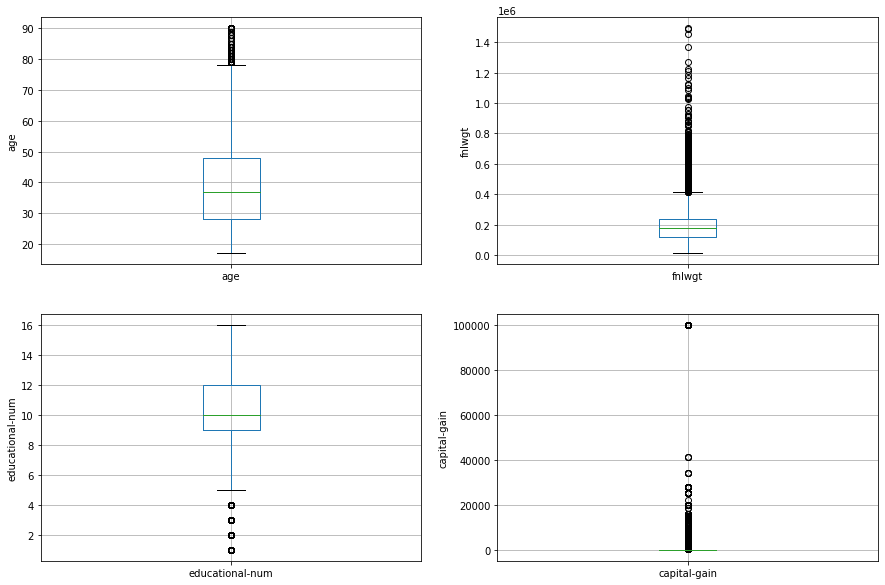

In [396]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = data.boxplot(column="age")
fig.set_title("")
fig.set_ylabel("age")

plt.subplot(2, 2, 2)
fig = data.boxplot(column="fnlwgt")
fig.set_title("")
fig.set_ylabel("fnlwgt")

plt.subplot(2, 2, 3)
fig = data.boxplot(column="educational-num")
fig.set_title("")
fig.set_ylabel("educational-num")

plt.subplot(2, 2, 4)
fig = data.boxplot(column="capital-gain")
fig.set_title("")
fig.set_ylabel("capital-gain")

Text(0, 0.5, 'income_>50K')

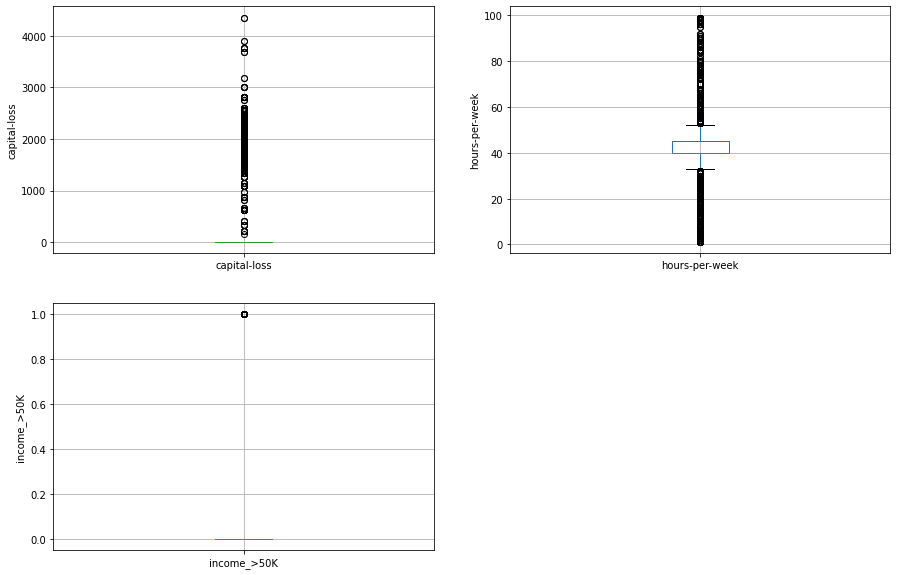

In [397]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = data.boxplot(column="capital-loss")
fig.set_title("")
fig.set_ylabel("capital-loss")

plt.subplot(2, 2, 2)
fig = data.boxplot(column="hours-per-week")
fig.set_title("")
fig.set_ylabel("hours-per-week")

plt.subplot(2, 2, 3)
fig = data.boxplot(column="income_>50K")
fig.set_title("")
fig.set_ylabel("income_>50K")


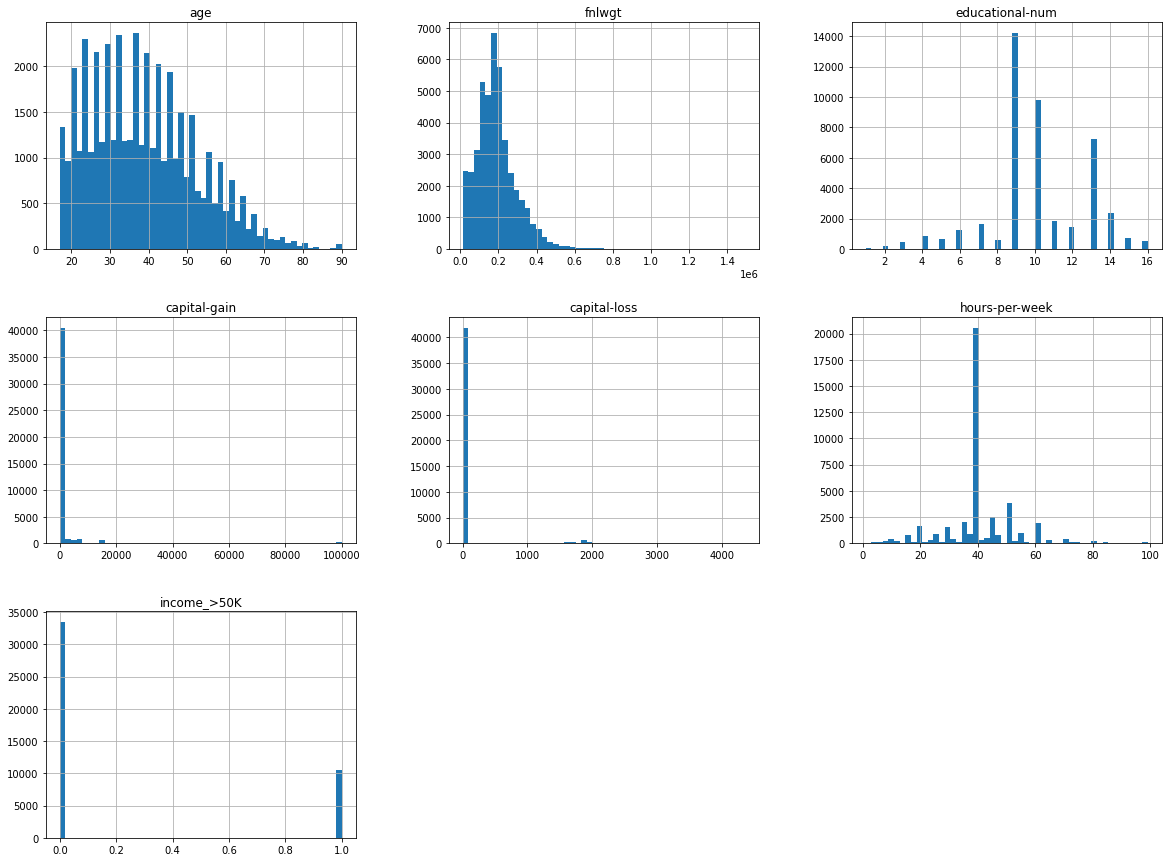

In [398]:
data.hist(bins=50, figsize=(20,15))
plt.show()

***- Nhận xét***: Sau khi xem các biểu đồ histogram, chúng tôi nhận thấy:
- Các biến dữ liệu `capital-gain`, `capital-loss`, `fnlwgt`,  `hours-per-week` có phân phối chủ yếu dồn về 1 cột.
- Biến nhãn `income_>50K` có phân phối ở hai giá trị '0' và '1'.
- Đa số các biến dữ liệu đều có phân phối không tự nhiên.

=> Do đó cần phải xử lý các biến này.

## **5. Tìm mối tương quan giữa các thuộc tính(Heat Map)**

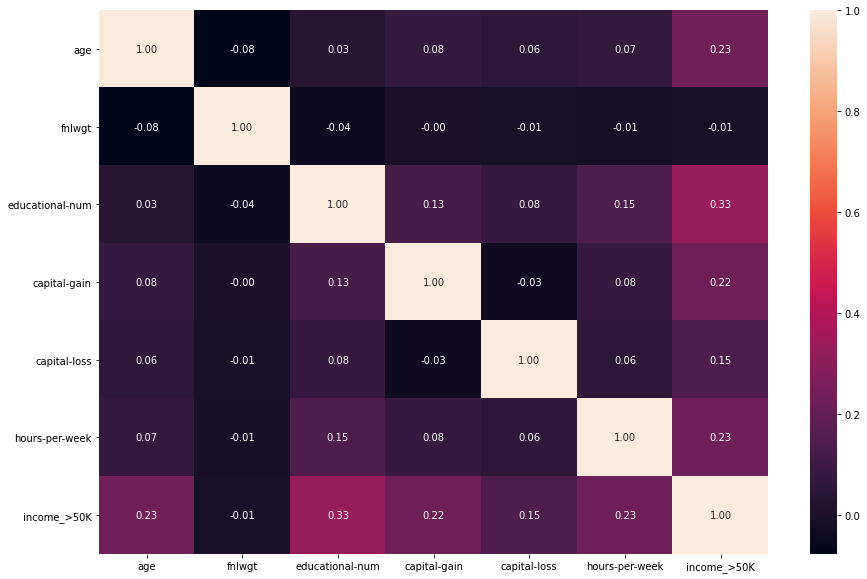

In [399]:
#Hiển thị HeatMap cho dữ liệu
plt.subplots(figsize=(15,10))
ax = sns.heatmap(data.corr(),annot=True, fmt='.2f')

***- Nhận xét***: 
- 2 biến giá trị được gọi là tương quan với nhau nếu nó có giá trị gần bằng 1, ta có thể quy ước 2 biến tương quan với nhau nếu độ tương quan của nó > 0.8
-Các cặp biến tương quan có thể rất có ích cho mô hình chúng ta, có thể xóa nó để kết quả được "tốt hơn"
- Có một điều ta có thể nhận ra là có rất ít các biến tương quan với biến 'đích' (`income_>50K`). Điều này có nghĩa là chúng nó không liên quan gì với nhau
-Đây là những thuộc tính khá tốt cho mô hình bài toán

# **III. TIỀN XỬ LÍ DỮ LIỆU**

In [400]:
X = data.drop(columns ="income_>50K")
y = data["income_>50K"]

## **1. Làm sạch dữ liệu (Data Cleaning)**
- Trong phần làm sạch dữ liệu, ta tiến hành xử lí dữ liệu bị thiếu và loại bỏ đi một số thuộc tính không cần thiết.

### **1.1. Xử lí dữ liệu bị thiếu (Missing data processing)**

*1.1.1 Kiểm tra dữ liệu thiếu (Checking for missing data)*

In [401]:
# Kiểm tra cột cụ thể nào có giá trị thiếu (null)
total = X.isnull().sum()
percent = (X.isnull().sum()/X.isnull().count()*100)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(15)

,Total,Percent
age,0,0.000000
workclass,2498,5.682826
fnlwgt,0,0.000000
education,0,0.000000
educational-num,0,0.000000
marital-status,0,0.000000
occupation,2506,5.701026
relationship,0,0.000000
race,0,0.000000
gender,0,0.000000


***- Nhận xét***: 
- Ta thấy có 3 thuộc tính hiện đang thiếu dữ liệu bao gồm: workclass (thiếu 2498 mẫu), occupation (thiếu 2506 mẫu) và native-country (thiếu 763 mẫu).

*1.1.2 Thay thế dữ liệu khuyết (Replacing Data)*
- Ta thấy 3 thuộc tính "workclass", "occupation", "native-country" đều có kiểu là nominal do đó sẽ thay thế các giá trị thiếu bằng giá trị xuất hiện nhiều nhất trong thuộc tính đó.

In [402]:
# In ra giá trị có tần xuất xuất hiện nhiều nhất của các thuộc tính
X.mode()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,33,Private,203488,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States


In [403]:
cate = [var for var in data.columns if data[var].dtype=='O']
for col in cate:
    print("Cột {} có giá trị xuất hiện nhiều nhất là: {}".format(col, data[col].mode()[0]))
    data[col].fillna(data[col].mode()[0], inplace=True)

Cột workclass có giá trị xuất hiện nhiều nhất là: Private
Cột education có giá trị xuất hiện nhiều nhất là: HS-grad
Cột marital-status có giá trị xuất hiện nhiều nhất là: Married-civ-spouse
Cột occupation có giá trị xuất hiện nhiều nhất là: Craft-repair
Cột relationship có giá trị xuất hiện nhiều nhất là: Husband
Cột race có giá trị xuất hiện nhiều nhất là: White
Cột gender có giá trị xuất hiện nhiều nhất là: Male
Cột native-country có giá trị xuất hiện nhiều nhất là: United-States


### **2. Loại bỏ một số thuộc tính (Removing some attributes)**
- Ta tiến hành loại bỏ thuộc tính 'educational-num' vì nó là đại diện kiểu numeric cho thuộc tính 'education'. 

In [404]:
class DataCleaning(BaseEstimator, TransformerMixin):
    # def __init__(self):
    def fit(self, X, y):
        return self
    def transform(self, X, y):
        X_ = X.copy()
        y_ = y.copy()
        #Bỏ cột dữ liệu educat.ional-num
        X_ = X_.drop(['educational-num'], axis = 1)

        # Xử lý thuộc tính workclass có giá trị NaN thành giá trị xuất hiện nhiều nhất 
        X_['workclass'].fillna(X_.workclass.mode().to_string(), inplace=True)

        # Xử lý thuộc tính occupation, native-country có giá trị NaN thành giá trị xuất hiện nhiều nhất 

        X_ = X_.fillna(value={'occupation':'Craft-repair','native-country':'United-States'})

        return X_, y_

    def fit_transform(self, X, y):
        return self.fit(X, y).transform(X, y)

In [405]:
X, y = DataCleaning().fit_transform(X, y)

In [406]:
X.head(5)

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,67,Private,366425,Doctorate,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States
1,17,Private,244602,12th,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States
2,31,Private,174201,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States
3,58,State-gov,110199,7th-8th,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States
4,25,State-gov,149248,Some-college,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States


In [407]:
# ta sẽ kiểm tra xem tất cả các thuộc tính đã đầy đủ dữ liệu chưa?
X.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
marital-status    0
occupation        0
relationship      0
race              0
gender            0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
dtype: int64

## **3. Mã hóa thuộc tính dạng nhóm (Encoding nominal attributes)**

- *Mã hóa LabelEncoder*

Để cho máy có thể học được, bắt buộc ta phải mã hóa thuộc tính dạng nhóm, thành một hoặc nhiều thuộc tính dạng số (numeric attributes). Một trong những cách để mã hóa đó là mã hóa LabelEncoder.


In [408]:
# LabelEncoder
class MultiColumnLabelEncoder(BaseEstimator, TransformerMixin):
    def __init__(self,columns=None):
        self.columns = columns

    def fit(self,X, y=None):
        return self

    def transform(self, X, y=None):
        X_ = X# .copy()
        if self.columns is not None:
            for col in self.columns:
                X_[col] = LabelEncoder().fit_transform(X_[col])
        else:
            for colname,col in X_.iteritems():
                X_[colname] = LabelEncoder().fit_transform(col)
        return X_
    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [409]:
# num_features = X.select_dtypes(exclude=[object]).columns.to_list()
cat_features = X.select_dtypes(exclude=[np.number]).columns.to_list()
MCLE = MultiColumnLabelEncoder(cat_features)
X = MultiColumnLabelEncoder(cat_features).fit_transform(X)

In [410]:
X.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,67,4,366425,10,0,3,1,4,1,99999,0,60,38
1,17,4,244602,2,4,7,3,4,1,0,0,15,38
2,31,4,174201,9,2,3,0,4,1,0,0,40,38
3,58,7,110199,5,2,13,0,4,1,0,0,40,38
4,25,7,149248,15,4,7,1,2,1,0,0,40,38


## **4. Co giãn dữ liệu (Scaling data)**

- *Chính quy hóa (standardisation)*

Co giãn dữ liệu là một phương pháp chuẩn hóa phạm vi của các đặc trưng dữ liệu và được thực hiện trong suốt quá trình tiền xử lí dữ liệu. Có các cách để co giãn dữ liệu như chuẩn hóa min-max, co giãn trung bình,...Chúng tôi sử dụng sử chính quy hóa (standardisation).

Việc chính quy hóa dữ liệu giúp cho giá trị của mỗi đặc trưng có trung bình bằng 0 và phương sai bằng 1. Phương pháp này được sử dụng rộng rãi trong việc chuẩn hóa dữ liệu của nhiều thuật toán học máy (SVM, logistic regression và ANNs).

Để tính toán chính quy hóa dữ liệu, ta phải xác định trung bình và độ lệch chuẩn cho phân phối của mỗi đặc trưng. Tiếp theo ta lấy mỗi giá trị của đặc trưng trừ đi giá trị trung bình rồi chia cho độ lệch chuẩn của đặc trưng đó như công thức dưới đây:

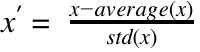

Trong đó *x* là véc-tơ đặc trưng ban đầu, *average(x)* là trung bình của véc-tơ đặc trưng đó và *std(x)* là độ lệch chuẩn của nó.

In [411]:
# Standardization
print('Standardization')

from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)

X[:1]

Standardization


array([[ 2.06657533,  0.08890486,  1.670303  , -0.07327939, -1.73719631,
        -0.6868188 , -0.27633216,  0.39280153,  0.70365905, 13.0646713 ,
        -0.21811671,  1.58000407,  0.26095218]])

## Gộp các bước tiền xử lí thành một hàm

In [412]:
def preprocessor(X, y):
    X, y = DataCleaning().fit_transform(X, y)
    X = MultiColumnLabelEncoder().fit_transform(X)

    column_name = X.columns
    indices = X.index
    X = StandardScaler().fit_transform(X)
    return pd.DataFrame(X, columns=column_name, index=indices), y

In [413]:
X = data.drop("income_>50K", axis=1)
y = data["income_>50K"].copy()

X, y = preprocessor(X, y)
#Gộp lại như cũ
data = pd.concat([X, y], axis=1, sort=False)

In [414]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43957 entries, 0 to 43956
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             43957 non-null  float64
 1   workclass       43957 non-null  float64
 2   fnlwgt          43957 non-null  float64
 3   education       43957 non-null  float64
 4   marital-status  43957 non-null  float64
 5   occupation      43957 non-null  float64
 6   relationship    43957 non-null  float64
 7   race            43957 non-null  float64
 8   gender          43957 non-null  float64
 9   capital-gain    43957 non-null  float64
 10  capital-loss    43957 non-null  float64
 11  hours-per-week  43957 non-null  float64
 12  native-country  43957 non-null  float64
dtypes: float64(13)
memory usage: 4.4 MB


## **5. Tách dữ liệu train-test (Train-test-split)**

In [415]:
from sklearn.model_selection import train_test_split
data_X_0 = data[data['income_>50K'] ==0]
data_Y_0 = data[data['income_>50K'] ==1]

In [416]:
train_data_0, test_data_0 = train_test_split(data_X_0, test_size = 0.3, random_state = 42)
train_data_1, test_data_1 = train_test_split(data_Y_0, test_size = 0.3, random_state = 42)

train_data = pd.concat([train_data_0, train_data_1])
train_data = train_data.sample(n = train_data.shape[0], random_state = 42)

test_data = pd.concat([test_data_0,test_data_1])
test_data = test_data.sample(n = test_data.shape[0] ,random_state = 42)

train_data.shape

#Tập dữ liệu train
X_train = train_data.drop("income_>50K", axis=1)
y_train = train_data["income_>50K"].copy()
X_train.shape 

(30769, 13)

In [417]:
#Tập dữ liệu test
X_test = test_data.drop("income_>50K", axis=1)
y_test = test_data["income_>50K"].copy()
X_test.shape
#Xong phần xử lý

(13188, 13)

***- Nhận xét chung:***
- Các dữ liệu bị thiếu đã được thêm vào đầy đủ
- Chuẩn hóa các thuộc tính để khi huấn luyện mô hình được tốt hơn(co giãn dữ liệu)
- Chia thành 2 tập train/test để đào tạo và kiểm định

# **IV. HUẤN LUYỆN DỮ LIỆU**

## Huấn luyện mô hình

# **Mục tiêu:**
- *Huấn luyện mô hình để đạt kết quả dự đoán tốt*
- *Dùng các độ đo như Accuracy, Precison, Recall, F1 để đánh giá kết quả mô hình*

**Quy ước 1 số độ đo**
- Precision (tỷ lệ các điểm thực sự = 1 trong số những điểm được dự đoán = 1) 
- Recall (Tỷ lệ những điểm = 1 trong những điểm thực sự = 1)

In [418]:
import time
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve, confusion_matrix
from sklearn.ensemble import VotingClassifier
from sklearn.tree import export_text
from sklearn import tree
from matplotlib import pyplot as plt

In [419]:
# Hàm vẽ confusion matrix
def CM_plot(M):
    X = [i/sum(i) for i in M]
    fig, ax = plt.subplots(figsize=(8,6))
    sns.heatmap(X, cmap='Blues', square = True, annot=True, ax=ax)
# Hàm vẽ tương quan predict và recall theo thresholds
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds, axlim):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16)
    plt.xlabel("Threshold", fontsize=16)
    plt.grid(True)
    plt.axis([-axlim, axlim, -0.05, 1.05])

###LogisticRegression


In [420]:
start = time.time()
LR_model = LogisticRegression(C = 100, solver='liblinear', random_state=0, max_iter=1000)
LR_model.fit(X_train, y_train)
y_pred = LR_model.predict(X_train)
stop = time.time()
LR_time = {stop - start}
print(f"Training time: {time_LR} s")
#y_train_pred = cross_val_predict(LR_model, X, y, cv=3)

Training time: {0.06948614120483398} s


In [421]:
y_train_pred = cross_val_predict(LR_model, X_train, y_train, cv=3)

accuracy score: 0.8029
precision score: 0.6888
recall score: 0.3214
f1 score: 0.4383


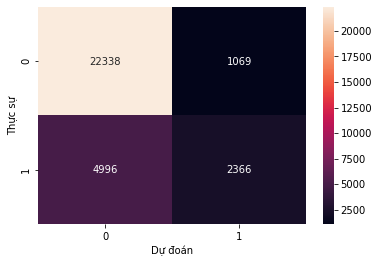

In [422]:
#Xem ma trận nhầm lẫn
cm_matrix = pd.crosstab(y_train, y_train_pred, rownames=["Thực sự"], colnames=["Dự đoán"])
sns.heatmap(cm_matrix, annot=True, fmt="d")

precision_score_LR = precision_score(y_train, y_train_pred)
recall_score_LR = recall_score(y_train, y_train_pred)
accuracy_score_LR = accuracy_score(y_train, y_train_pred)

print("accuracy score:", round(accuracy_score(y_train, y_train_pred), 4))
print("precision score:", round(precision_score(y_train, y_train_pred), 4))
print("recall score:", round(recall_score(y_train, y_train_pred), 4))
print("f1 score:", round(f1_score(y_train, y_train_pred), 4)) 

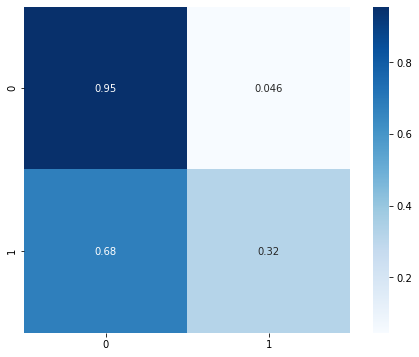

In [423]:
#Chuẩn hóa ma trận
CM_plot(confusion_matrix(y_train, y_train_pred))

***- Nhận xét chung mô hình Logistic Regression:*** 
- Sau khi cố gắng thay đổi một số tham số trên mô hình Logistic thì chúng ta nhận thấy các kết quả(độ đánh giá) của mô hình thực sự không thay đổi nhiều

###DecisionTreeClassifier

Training time: {0.07050824165344238}s


[Text(279.0, 475.65000000000003, 'relationship <= -0.589\ngini = 0.364\nsamples = 30769\nvalue = [23407, 7362]\nclass = 1'),
 Text(139.5, 339.75, 'capital-gain <= 3.043\ngini = 0.495\nsamples = 12490\nvalue = [6893, 5597]\nclass = 1'),
 Text(69.75, 203.85000000000002, 'education <= -0.976\ngini = 0.48\nsamples = 11482\nvalue = [6885, 4597]\nclass = 1'),
 Text(34.875, 67.94999999999999, 'gini = 0.191\nsamples = 1414\nvalue = [1263, 151]\nclass = 1'),
 Text(104.625, 67.94999999999999, 'gini = 0.493\nsamples = 10068\nvalue = [5622, 4446]\nclass = 1'),
 Text(209.25, 203.85000000000002, 'age <= 1.739\ngini = 0.016\nsamples = 1008\nvalue = [8, 1000]\nclass = 0'),
 Text(174.375, 67.94999999999999, 'gini = 0.002\nsamples = 907\nvalue = [1, 906]\nclass = 0'),
 Text(244.125, 67.94999999999999, 'gini = 0.129\nsamples = 101\nvalue = [7, 94]\nclass = 0'),
 Text(418.5, 339.75, 'capital-gain <= 3.631\ngini = 0.174\nsamples = 18279\nvalue = [16514, 1765]\nclass = 1'),
 Text(348.75, 203.85000000000002,

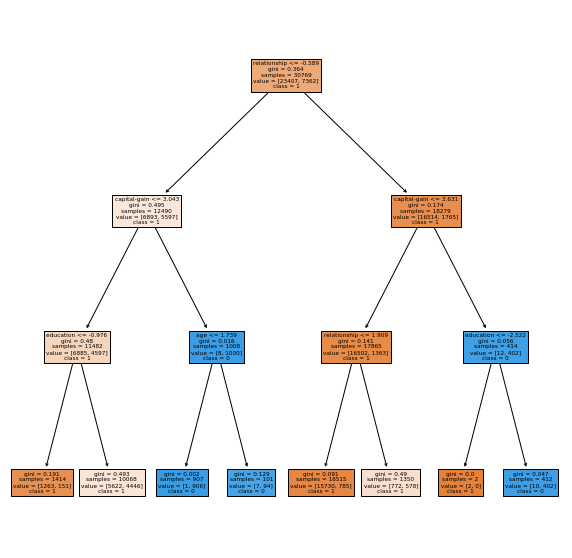

In [424]:
#Thử nghiệm mô hình với max_depth = 3 (Đạt kết quả khá tốt)
start = time.time()
X_train_name = [var for var in X_train.columns]
DT_model = DecisionTreeClassifier(random_state=0, max_depth=3)
DT_model = DT_model.fit(X_train, y_train)
y_train_str = y_train.astype(str)
stop = time.time()
DT_time = {stop - start}
print(f"Training time: {DT_time}s")
fig = plt.figure(figsize=(10,10))
tree.plot_tree(DT_model, feature_names=X_train_name,  class_names=y_train_str.unique(), filled=True)

In [425]:
y_train_pred = cross_val_predict(DT_model, X_train, y_train, cv=3)

accuracy score: 0.8095
precision score: 0.9652
recall score: 0.2112
f1 score: 0.3466


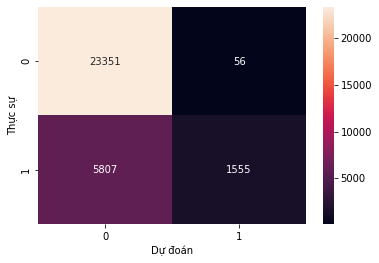

In [426]:
#Xem ma trận nhầm lẫn
cm_matrix = pd.crosstab(y_train, y_train_pred, rownames=["Thực sự"], colnames=["Dự đoán"])
sns.heatmap(cm_matrix, annot=True, fmt="d")

precision_score_DT = precision_score(y_train, y_train_pred)
recall_score_DT = recall_score(y_train, y_train_pred)
accuracy_score_DT = accuracy_score(y_train,y_train_pred)

print("accuracy score:", round(accuracy_score(y_train, y_train_pred), 4))
print("precision score:", round(precision_score(y_train, y_train_pred), 4))
print("recall score:", round(recall_score(y_train, y_train_pred), 4))
print("f1 score:", round(f1_score(y_train, y_train_pred), 4))

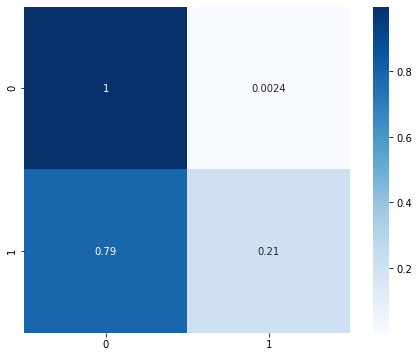

In [427]:
#Chuẩn hóa ma trận
CM_plot(confusion_matrix(y_train, y_train_pred))

***- Nhận xét chung mô hình Decision Tree:*** 
- Chúng em thử thay đổi một số tham số trên mô hình như: `max_dept`, `random_state` và nhận thấy ở một độ sâu nhất định thì mô hình sẽ đạt kết quả tốt nhất. Ví dụ: Ở độ sâu = 2, 3 thì độ đo `precision` = 98% nhưng nếu độ sâu tăng lên 4,5,.. thì `precision` sẽ giảm dần

### Support Vector Machine

1. Phân loại tuyến tính SVM

In [428]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
start = time.time()
SVM_Linear_model = Pipeline([
 ("scaler", StandardScaler()),
 ("linear_svc", LinearSVC(C=10, loss="hinge", max_iter = 1000000)),
 ])
SVM_Linear_model.fit(X_train, y_train)
stop = time.time()
SVM_time = {stop - start}
print(f"Training time: {SVM_time}s")

Training time: {52.860705852508545}s


In [429]:
y_train_pred = cross_val_predict(SVM_Linear_model, X_train, y_train, cv=3) 

accuracy score: 0.803
precision score: 0.7039
recall score: 0.3045
f1 score: 0.4251


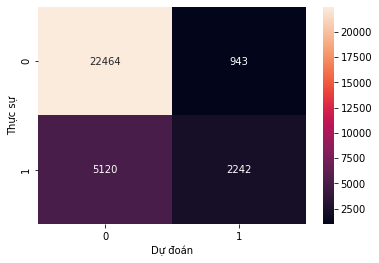

In [430]:
#Xem ma trận nhầm lẫn
cm_matrix = pd.crosstab(y_train, y_train_pred, rownames=["Thực sự"], colnames=["Dự đoán"])
sns.heatmap(cm_matrix, annot=True, fmt="d")

precision_score_SVM_Linear = precision_score(y_train, y_train_pred)
recall_score_SVM_Linear = recall_score(y_train, y_train_pred)
accuracy_score_SVM_Linear = accuracy_score(y_train,y_train_pred)

print("accuracy score:", round(accuracy_score(y_train, y_train_pred), 4))
print("precision score:", round(precision_score(y_train, y_train_pred), 4))
print("recall score:", round(recall_score(y_train, y_train_pred), 4))
print("f1 score:", round(f1_score(y_train, y_train_pred), 4))

***- Nhận xét chung mô hình SVM:***
- Mô hình chưa thực sự đạt kết quả tốt, độ đo recall quá thấp

###RandomForestClassifier

In [431]:
start = time.time()
RF_model=RandomForestClassifier(n_estimators=100)
RF_model.fit(X_train, y_train)
y_pred = RF_model.predict(X_test)
stop = time.time()
RF_time = {stop - start}
print(f"Training time: {RF_time} s")

Training time: {3.675889492034912} s


In [432]:
y_train_pred = cross_val_predict(RF_model, X_train, y_train, cv=3) 

accuracy score: 0.8558
precision score: 0.7417
recall score: 0.6099
f1 score: 0.6694


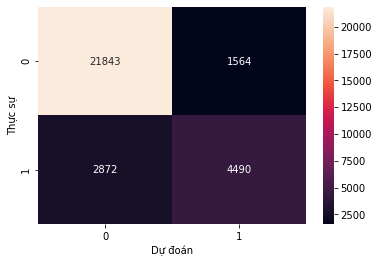

In [433]:
cm_matrix = pd.crosstab(y_train, y_train_pred, rownames=["Thực sự"], colnames=["Dự đoán"])
sns.heatmap(cm_matrix, annot=True, fmt="d")

precision_score_RF = precision_score(y_train, y_train_pred)
recall_score_RF = recall_score(y_train, y_train_pred)
accuracy_score_RF = accuracy_score(y_train,y_train_pred)

print("accuracy score:", round(accuracy_score(y_train, y_train_pred), 4))
print("precision score:", round(precision_score(y_train, y_train_pred), 4))
print("recall score:", round(recall_score(y_train, y_train_pred), 4))
print("f1 score:", round(f1_score(y_train, y_train_pred), 4))

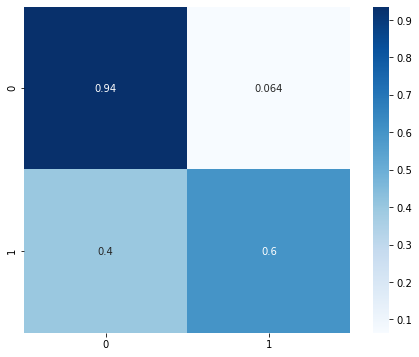

In [434]:
#Chuẩn hóa ma trận
CM_plot(confusion_matrix(y_test, y_pred))

***- Nhận xét chung mô hình Random Forest Classifier:*** 
- Kết quả chưa được tối ưu

####Model Report

In [435]:
print('Các độ đo thông số của các mô hình:')
print('Support Vector Machine: \n','precision:', precision_score_SVM_Linear, '\n recall: ',recall_score_SVM_Linear)
print('======================================================')
print('LogisticRegression : \n','precision:',precision_score_LR,'\n recall:',recall_score_LR)
print('======================================================')
print('DecisionTreeClassifier : \n','precision:',precision_score_DT,'\n recall:',recall_score_DT)
print('======================================================')
print('RandomForestClassifier: \n','precision:',precision_score_RF,'\n recall:',recall_score_RF)

Các độ đo thông số của các mô hình:
Support Vector Machine: 
 precision: 0.7039246467817897 
 recall:  0.30453681064928007
LogisticRegression : 
 precision: 0.6887918486171761 
 recall: 0.32138005976636785
DecisionTreeClassifier : 
 precision: 0.9652389819987586 
 recall: 0.21121977723444715
RandomForestClassifier: 
 precision: 0.7416584076643541 
 recall: 0.6098886172235806


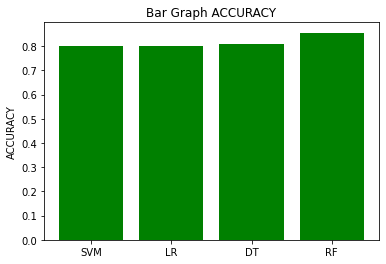

In [436]:
#in biểu đồ
BarGraph=['SVM','LR','DT','RF']
accuracy=[accuracy_score_SVM_Linear,accuracy_score_LR,accuracy_score_DT,accuracy_score_RF]
plt.bar(BarGraph,accuracy,color='green')
plt.title('Bar Graph ACCURACY')
plt.xlabel('')
plt.ylabel('ACCURACY')
plt.show()

In [437]:
print('Thời gian huấn luyện các mô hình:')
print('Support Vector Machine: \n','time:', SVM_time)
print('======================================================')
print('LogisticRegression : \n','time:',LR_time)
print('======================================================')
print('DecisionTreeClassifier : \n','time:',DT_time)
print('======================================================')
print('RandomForestClassifier: \n','time:',RF_time)

Thời gian huấn luyện các mô hình:
Support Vector Machine: 
 time: {52.860705852508545}
LogisticRegression : 
 time: {0.06375622749328613}
DecisionTreeClassifier : 
 time: {0.07050824165344238}
RandomForestClassifier: 
 time: {3.675889492034912}


***- Nhận xét***: 
- Đa số các mô hình đều có kết quả không tốt vì các tham số truyền vào chưa thực sự tốt. Do đó chúng ta cần tinh chỉnh các mô hình này để tìm được tham số tốt nhất cho các mô hình, nâng cao hiệu suất bài toán.
- Mô hình thuật toán Random Forest cho kết quả độ chính xác `accuracy` cao nhất với 85.55%, trong khi đó thời gian huấn luyện cho mô hình Logistic Regression là thấp nhất với 0.063s.
- Chúng tôi nhận thấy tại thời điểm hiện tại, mô hình thuật toán Random Forest đang là mô hình tốt nhất với độ chính xác `accuracy` là 85.55% và thời gian huấn luyện `time` là 3.67 s.


# **V. Tinh chỉnh mô hình**

**Mục tiêu**
- Cố gắng tối ưu hóa độ đo `precision` (tìm chính xác nhất có thể)
- Mỗi mô hình máy học có những siêu tham số riêng (hyperparameter).
- Cần phải thử nhiều bộ tham số để tìm ra bộ tham số tốt nhất


## **Với GridSearch**

In [438]:
import time
from sklearn.model_selection import GridSearchCV

### LogisticRegression

In [439]:
param_grid={"C":np.logspace(-3,3,7),  
      "solver":['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
      'penalty': ['l1', 'l2']}
split = KFold(n_splits=4, shuffle=True, random_state=42)
LR = LogisticRegression(random_state=42)
grid_search_LR = GridSearchCV(LR, param_grid, cv=split,
                           scoring='precision',
                           return_train_score=True)
grid_search_LR.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_

GridSearchCV(cv=KFold(n_splits=4, random_state=42, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=42, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             pre_dispatch

In [440]:
print("best score:", grid_search_LR.best_score_)
#print("recall score:", grid_search_LR.best_score_)
print("best params:", grid_search_LR.best_params_)

best score: 0.8376143766382271
best params: {'C': 0.001, 'penalty': 'l1', 'solver': 'saga'}


In [441]:
y_pred_acc = grid_search_LR.predict(X_train)
accuracy_score(y_train,y_pred_acc)
# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_train,y_pred_acc)))
print('Precision Score : ' + str(precision_score(y_train,y_pred_acc)))
print('Recall Score : ' + str(recall_score(y_train,y_pred_acc)))
print('F1 Score : ' + str(f1_score(y_train,y_pred_acc)))

#Logistic Regression (Grid Search) Confusion matrix
confusion_matrix(y_train,y_pred_acc)

Accuracy Score : 0.7997009977574832
Precision Score : 0.7917274939172749
Recall Score : 0.22099972833469167
F1 Score : 0.3455452904321971


array([[22979,   428],
       [ 5735,  1627]])

In [442]:
start = time.time()
LR_grid_model = LogisticRegression(C =0.001,solver='saga')
LR_grid_model.fit(X_train, y_train)
#y_train_pred = cross_val_predict(LR_model, X, y, cv=3)
y_train_pred = LR_grid_model.predict(X_train)
stop = time.time()
LR_Grid_time = {stop - start}
print(f"Training time: {LR_Grid_time} s")

Training time: {0.15232276916503906} s


accuracy score: 0.8044460333452501
precision score: 0.7302
recall score: 0.2897
f1 score: 0.4149


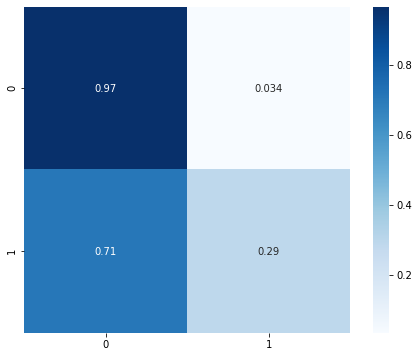

In [443]:
CM_plot(confusion_matrix(y_train, y_train_pred))
accuracy_score_LR_Grid = accuracy_score(y_train, y_train_pred)
print("accuracy score:", accuracy_score_LR_Grid)
print("precision score:", round(precision_score(y_train, y_train_pred), 4))
print("recall score:", round(recall_score(y_train, y_train_pred), 4))
print("f1 score:", round(f1_score(y_train, y_train_pred), 4))

### SupportVectorMachine

In [444]:
param_grid = {
    'gamma':[1e-2, 1e-3], 
    'C': [1e2, 1e3],
    }
split = KFold(n_splits=4, shuffle=True, random_state=42)
SVM = SVC(random_state=42)
grid_search_SVM = GridSearchCV(SVM, param_grid, cv=split,
                           scoring='precision',
                           return_train_score=True)
grid_search_SVM.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=4, random_state=42, shuffle=True),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=42, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [100.0, 1000.0], 'gamma': [0.01, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='precision', verbose=0)

In [445]:
print("best score:", grid_search_SVM.best_score_)
#print("recall score:", grid_search_SVM.best_score_)
print("best params:", grid_search_SVM.best_params_)

best score: 0.8563388409960738
best params: {'C': 1000.0, 'gamma': 0.001}


In [446]:
y_pred_acc = grid_search_SVM.predict(X_train)
y1=accuracy_score(y_train,y_pred_acc)
# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_train,y_pred_acc)))
print('Precision Score : ' + str(precision_score(y_train,y_pred_acc)))
print('Recall Score : ' + str(recall_score(y_train,y_pred_acc)))
print('F1 Score : ' + str(f1_score(y_train,y_pred_acc)))

#Logistic Regression (Grid Search) Confusion matrix
confusion_matrix(y_train,y_pred_acc)

Accuracy Score : 0.8153986154896161
Precision Score : 0.8609442060085837
Recall Score : 0.27248030426514536
F1 Score : 0.41394964919521254


array([[23083,   324],
       [ 5356,  2006]])

In [447]:
start = time.time()
SVM_grid_model = SVC(C= 1000.0, gamma= 0.001)
SVM_grid_model.fit(X_train, y_train)

y_train_pred = SVM_grid_model.predict(X_train)
stop = time.time()
SVM_Grid_time = {stop - start}
print(f"Training time: {SVM_Grid_time} s")

Training time: {58.418415546417236} s


accuracy score: 0.8153986154896161
precision score: 0.8609
recall score: 0.2725
f1 score: 0.4139


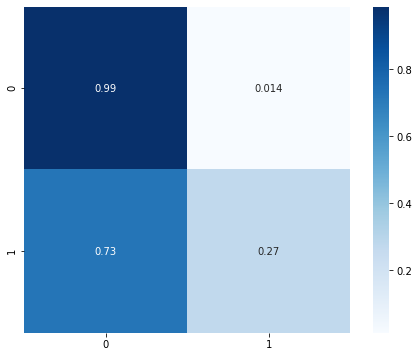

In [448]:
CM_plot(confusion_matrix(y_train, y_train_pred))
accuracy_score_SVM_Grid = accuracy_score(y_train, y_train_pred)
print("accuracy score:", accuracy_score_SVM_Grid)
print("precision score:", round(precision_score(y_train, y_train_pred), 4))
print("recall score:", round(recall_score(y_train, y_train_pred), 4))
print("f1 score:", round(f1_score(y_train, y_train_pred), 4))

### DecisionTreeClassifier

In [449]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'criterion':['gini','entropy'],
    'max_depth':[3,4,5,6,11,15,20],
    'max_features': ['auto', 'sqrt','log2'],
    'min_samples_leaf' : [1,2,3,8],
    }

split = KFold(n_splits=4, shuffle=True, random_state=42)
DTC_model = DecisionTreeClassifier(random_state=42)
grid_search_DTC = GridSearchCV( DTC_model, param_grid, cv=split,
                           scoring='precision',
                           return_train_score=True)
grid_search_DTC.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=4, random_state=42, shuffle=True),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_g

In [450]:
print("best score:", grid_search_DTC.best_score_)
#print("recall score:", grid_search_SVM.best_score_)
print("best params:", grid_search_DTC.best_params_)

best score: 0.9900880308438983
best params: {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 2}


In [451]:
y_pred_acc = grid_search_DTC.predict(X_train)
accuracy_score(y_train,y_pred_acc)

# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_train,y_pred_acc)))
print('Precision Score : ' + str(precision_score(y_train,y_pred_acc)))
print('Recall Score : ' + str(recall_score(y_train,y_pred_acc)))
print('F1 Score : ' + str(f1_score(y_train,y_pred_acc)))

#Decision Tree Classifier (Grid Search) Confusion matrix
confusion_matrix(y_train,y_pred_acc)

Accuracy Score : 0.8009360070200526
Precision Score : 0.9889328063241106
Recall Score : 0.16992665036674817
F1 Score : 0.29001970557551876


array([[23393,    14],
       [ 6111,  1251]])

In [452]:
start = time.time()
DT_grid_model = DecisionTreeClassifier(criterion='entropy', max_depth= 4, max_features= 'auto', min_samples_leaf= 2)
DT_grid_model.fit(X_train, y_train)

y_train_pred = DT_grid_model.predict(X_train)
stop = time.time()
DT_Grid_time = {stop - start}
print(f"Training time: {DT_Grid_time} s")

Training time: {0.02375650405883789} s


accuracy score: 0.8015860118950893
precision score: 0.8839
recall score: 0.1965
f1 score: 0.3216


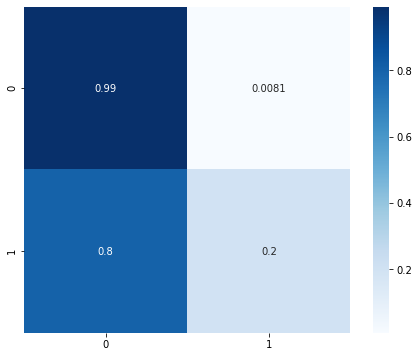

In [453]:
CM_plot(confusion_matrix(y_train, y_train_pred))
accuracy_score_DT_Grid = accuracy_score(y_train, y_train_pred)
print("accuracy score:", accuracy_score_DT_Grid)
print("precision score:", round(precision_score(y_train, y_train_pred), 4))
print("recall score:", round(recall_score(y_train, y_train_pred), 4))
print("f1 score:", round(f1_score(y_train, y_train_pred), 4))

### RandomForestClassifier

In [454]:
param_grid = {
    'criterion':['gini', 'entropy'],
    'n_estimators': [50, 100, 150],
    'max_features': ['auto', None],
    'bootstrap': [True, False],
    'n_jobs': [-1]
    }
split = KFold(n_splits=4, shuffle=True, random_state=42)
forest_clf = RandomForestClassifier(random_state=42)
grid_search_RFC = GridSearchCV(forest_clf, param_grid, cv=split,
                           scoring='precision',
                           return_train_score=True)
grid_search_RFC.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=4, random_state=42, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fr....0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, r

In [455]:
print("best score:", grid_search_RFC.best_score_)
#print("recall score:", grid_search_SVM.best_score_)
print("best params:", grid_search_RFC.best_params_)

best score: 0.7470965235311067
best params: {'bootstrap': True, 'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 50, 'n_jobs': -1}


In [456]:
y_pred_acc = grid_search_RFC.predict(X_train)
accuracy_score(y_train,y_pred_acc)

# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_train,y_pred_acc)))
print('Precision Score : ' + str(precision_score(y_train,y_pred_acc)))
print('Recall Score : ' + str(recall_score(y_train,y_pred_acc)))
print('F1 Score : ' + str(f1_score(y_train,y_pred_acc)))

#Random Forest Classifier (Grid Search) Confusion matrix
confusion_matrix(y_train,y_pred_acc)

Accuracy Score : 0.9995449965874744
Precision Score : 0.9994562262098967
Recall Score : 0.9986416734582994
F1 Score : 0.9990487838021471


array([[23403,     4],
       [   10,  7352]])

In [457]:
start = time.time()
RF_grid_model = RandomForestClassifier(bootstrap= 'True', criterion= 'gini', max_features= 'auto', n_estimators= 50, n_jobs= -1)
RF_grid_model.fit(X_train, y_train)

y_train_pred = RF_grid_model.predict(X_train)
stop = time.time()
RF_Grid_time = {stop - start}
print(f"Training time: {RF_Grid_time} s")

Training time: {1.634213924407959} s


accuracy score: 0.9993499951249635
precision score: 0.9997
recall score: 0.9976
f1 score: 0.9986


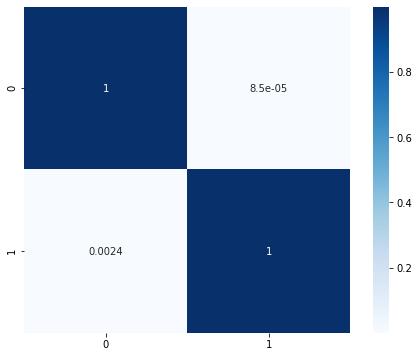

In [458]:
CM_plot(confusion_matrix(y_train, y_train_pred))
accuracy_score_RF_Grid = accuracy_score(y_train, y_train_pred)
print("accuracy score:", accuracy_score_RF_Grid)
print("precision score:", round(precision_score(y_train, y_train_pred), 4))
print("recall score:", round(recall_score(y_train, y_train_pred), 4))
print("f1 score:", round(f1_score(y_train, y_train_pred), 4))

#### Model Report

In [459]:
print('Các độ đo thông số của các mô hình:')
print('Support Vector Machine\nClassification Report: \n',accuracy_score_SVM_Grid)
print('======================================================')
print('LogisticRegression\nClassification Report: \n',accuracy_score_LR_Grid)
print('======================================================')
print('DecisionTreeClassifier\nClassification Report: \n',accuracy_score_DT_Grid)
print('======================================================')
print('RandomForestClassifier\nClassification Report: \n',accuracy_score_RF_Grid)

Các độ đo thông số của các mô hình:
Support Vector Machine
Classification Report: 
 0.8153986154896161
LogisticRegression
Classification Report: 
 0.8044460333452501
DecisionTreeClassifier
Classification Report: 
 0.8015860118950893
RandomForestClassifier
Classification Report: 
 0.9993499951249635


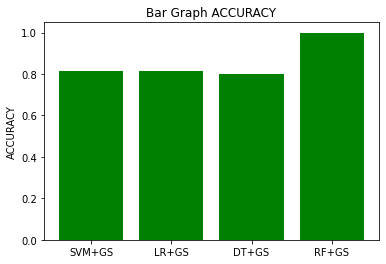

In [460]:
#in biểu đồ
BarGraph=['SVM+GS','LR+GS','DT+GS','RF+GS']
accuracy=[accuracy_score_SVM_Grid,accuracy_score_SVM_Grid,accuracy_score_DT_Grid,accuracy_score_RF_Grid]
plt.bar(BarGraph,accuracy,color='green')
plt.title('Bar Graph ACCURACY')
plt.xlabel('')
plt.ylabel('ACCURACY')
plt.show()

In [461]:
print('Thời gian huấn luyện các mô hình:')
print('Support Vector Machine: \n','time:', SVM_Grid_time)
print('======================================================')
print('LogisticRegression : \n','time:',LR_Grid_time)
print('======================================================')
print('DecisionTreeClassifier : \n','time:',DT_Grid_time)
print('======================================================')
print('RandomForestClassifier: \n','time:',RF_Grid_time)

Thời gian huấn luyện các mô hình:
Support Vector Machine: 
 time: {58.418415546417236}
LogisticRegression : 
 time: {0.15232276916503906}
DecisionTreeClassifier : 
 time: {0.02375650405883789}
RandomForestClassifier: 
 time: {1.634213924407959}


***- Nhận xét***: 
- Ta sử dụng phương pháp Grid Search để tìm được các tham số tốt, phù hợp cho mô hình mà ta đang mong muốn cải thiện. Sau khi chúng tôi sử dụng các tham số Grid Search để train thì chúng tôi nhận thấy các độ đo của các mô hình có chiều hướng tăng, điều này cải thiện được hiệu suất bài toán.
- Sau khi áp dụng chạy GirdSearch, chúng tôi thấy mô hình thuật toán Random Forest cho kết quả độ chính xác `accuracy` cao nhất với 99.95%, trong khi đó thời gian huấn luyện cho mô hình Decision Tree là thấp nhất với 0.027s.
-  Chúng tôi nhận thấy tại thời điểm hiện tại, mô hình thuật toán Random Forest (GridSearch) đang là mô hình tốt nhất với độ chính xác `accuracy` là 99.95% và thời gian huấn luyện `time` là 1.64 s. Có thể thấy Random Forest đã tăng độ `accuracy` từ 85.55% lên 99.95%.


## Với Feature Engineering

### Principal Component Analysis (PCA)

In [462]:
#PCA
import time    
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve, confusion_matrix
from sklearn.ensemble import VotingClassifier
from sklearn.tree import export_text
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

pca = PCA(n_components=8,svd_solver='full')
X_reduced=pca.fit_transform(X_train)
X_test_reduced=pca.fit_transform(X_train)
Y_Train=y_train
Y_Test=y_test

#### Support Vector Machine

SVM

Training time: {60.1667115688324} s
Support Vector Machine
Classification Report: 

accuracy score: 0.8123
precision score: 0.8059
recall score: 0.2838
f1 score: 0.4197


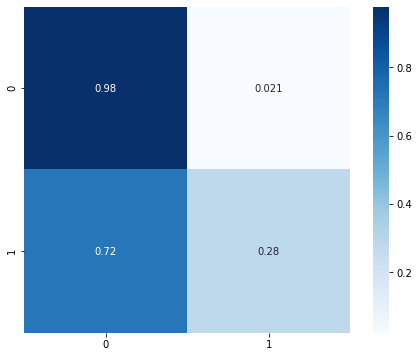

In [463]:
#SVM
print('SVM\n')
start = time.time()
PCASVM_model = SVC(C= 1000.0, gamma= 0.001)
PCASVM_model.fit(X_reduced, Y_Train)
y_pred=PCASVM_model.predict(X_reduced)
stop = time.time()
SVM_PCA_time = {stop - start}
print(f"Training time: {SVM_PCA_time} s")
CM_plot(confusion_matrix(Y_Train, y_pred))
accuracy_score_PCASVM = accuracy_score(Y_Train, y_pred)
print('Support Vector Machine\nClassification Report: \n')
print("accuracy score:", round(accuracy_score(Y_Train, y_pred), 4))
print("precision score:", round(precision_score(Y_Train, y_pred), 4))
print("recall score:", round(recall_score(Y_Train, y_pred), 4))
print("f1 score:", round(f1_score(Y_Train, y_pred), 4))

#### RandomForestClassifier

RandomForest

Training time: {3.5423386096954346} s
RandomForestClassifier
Classification Report: 

accuracy score: 0.9995
precision score: 0.9997
recall score: 0.9981
f1 score: 0.9989


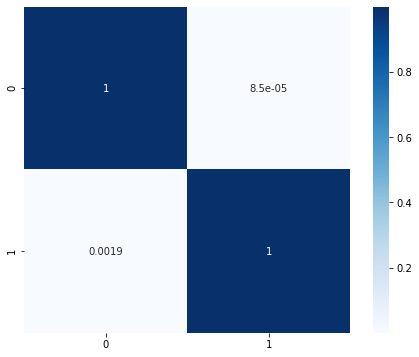

In [464]:
#RandomForest
print('RandomForest\n')
start = time.time()
PCARF_model=RandomForestClassifier(bootstrap= True, criterion= 'gini', max_features= 'auto', n_estimators =50, n_jobs= -1)
PCARF_model.fit(X_reduced,Y_Train)
y_pred=PCARF_model.predict(X_reduced)
stop = time.time()
RF_PCA_time = {stop - start}
print(f"Training time: {RF_PCA_time} s")
CM_plot(confusion_matrix(Y_Train, y_pred))
accuracy_score_PCARF = accuracy_score(Y_Train, y_pred)
print('RandomForestClassifier\nClassification Report: \n')
print("accuracy score:", round(accuracy_score(Y_Train, y_pred), 4))
print("precision score:", round(precision_score(Y_Train, y_pred), 4))
print("recall score:", round(recall_score(Y_Train, y_pred), 4))
print("f1 score:", round(f1_score(Y_Train, y_pred), 4))

#### Logistic Regression

Logictics Regression

Training time: {0.13168644905090332} s
LogisticRegression
Classification Report: 

accuracy score: 0.7869
precision score: 0.7359
recall score: 0.1703
f1 score: 0.2766


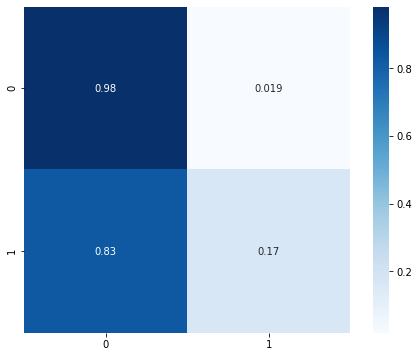

In [465]:
#Logictics Regression
print('Logictics Regression\n')
start = time.time()
PCALR_model = LogisticRegression(C=0.001, penalty= 'l1', solver= 'saga')
PCALR_model.fit(X_reduced,Y_Train)
y_pred=PCALR_model.predict(X_reduced)
stop = time.time()
LR_PCA_time = {stop - start}
print(f"Training time: {LR_PCA_time} s")
CM_plot(confusion_matrix(Y_Train, y_pred))
accuracy_score_PCALR = accuracy_score(Y_Train, y_pred)
print('LogisticRegression\nClassification Report: \n')
print("accuracy score:", round(accuracy_score(Y_Train, y_pred), 4))
print("precision score:", round(precision_score(Y_Train, y_pred), 4))
print("recall score:", round(recall_score(Y_Train, y_pred), 4))
print("f1 score:", round(f1_score(Y_Train, y_pred),4))

#### DecisionTreeClassifier

DecisionTree

Training time: {0.07030773162841797} s
DecisionTreeClassifier
Classification Report: 

accuracy score: 0.8056
precision score: 0.8347
recall score: 0.2339
f1 score: 0.3654


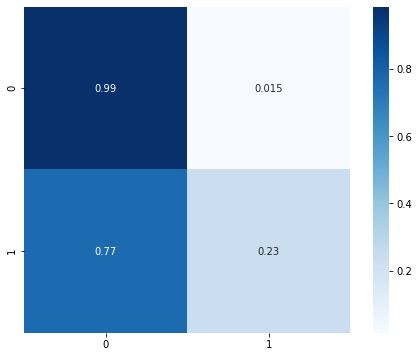

In [466]:
#DecisionTree
print('DecisionTree\n')
start = time.time()
PCADT_model = DecisionTreeClassifier(criterion= 'entropy', max_depth= 4, max_features= 'auto', min_samples_leaf= 2)
PCADT_model = PCADT_model.fit(X_reduced,Y_Train)
y_pred=PCADT_model.predict(X_reduced)
stop = time.time()
DT_PCA_time = {stop - start}
print(f"Training time: {DT_PCA_time} s")
CM_plot(confusion_matrix(Y_Train, y_pred))
accuracy_score_PCADT = accuracy_score(Y_Train, y_pred)
print('DecisionTreeClassifier\nClassification Report: \n')
print("accuracy score:", round(accuracy_score(Y_Train, y_pred), 4))
print("precision score:", round(precision_score(Y_Train, y_pred), 4))
print("recall score:", round(recall_score(Y_Train, y_pred), 4))
print("f1 score:", round(f1_score(Y_Train, y_pred), 4))

##### Model Report

In [467]:
print('Các độ đo thông số của các mô hình:')
print('Support Vector Machine\nClassification Report: \n',accuracy_score_PCASVM)
print('======================================================')
print('LogisticRegression\nClassification Report: \n',accuracy_score_PCALR)
print('======================================================')
print('DecisionTreeClassifier\nClassification Report: \n',accuracy_score_PCADT)
print('======================================================')
print('RandomForestClassifier\nClassification Report: \n',accuracy_score_PCARF)

Các độ đo thông số của các mô hình:
Support Vector Machine
Classification Report: 
 0.8122785920894406
LogisticRegression
Classification Report: 
 0.786863401475511
DecisionTreeClassifier
Classification Report: 
 0.8056160421203159
RandomForestClassifier
Classification Report: 
 0.9994799960999707


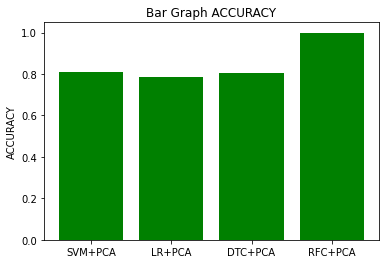

In [468]:
#in biểu đồ
BarGraph=['SVM+PCA','LR+PCA','DTC+PCA','RFC+PCA']
accuracy=[accuracy_score_PCASVM,accuracy_score_PCALR,accuracy_score_PCADT ,accuracy_score_PCARF]
plt.bar(BarGraph,accuracy,color='green')
plt.title('Bar Graph ACCURACY')
plt.xlabel('  ')
plt.ylabel('ACCURACY')
plt.show()

In [469]:
print('Thời gian huấn luyện các mô hình:')
print('Support Vector Machine: \n','time:', SVM_PCA_time)
print('======================================================')
print('LogisticRegression : \n','time:',LR_PCA_time)
print('======================================================')
print('DecisionTreeClassifier : \n','time:',DT_PCA_time)
print('======================================================')
print('RandomForestClassifier: \n','time:',RF_PCA_time)

Thời gian huấn luyện các mô hình:
Support Vector Machine: 
 time: {60.1667115688324}
LogisticRegression : 
 time: {0.13168644905090332}
DecisionTreeClassifier : 
 time: {0.07030773162841797}
RandomForestClassifier: 
 time: {3.5423386096954346}


***- Nhận xét***: 
- Sau khi sử dụng PCA để giảm chiều kích thước của dữ liệu, ta nhận thấy các độ đo của các mô hình có chiều hướng giảm, tuy nhiên ở mô hình Random Forest vẫn có kết quả rất tốt và không thay đổi.
- Qua việc nhìn nhận các độ đo này của các mô hình, chúng tôi cho rằng áp dụng PCA vào không giúp tăng độ chính xác của việc tinh chỉnh mô hình.
- Sau khi áp dụng chạy GridSearch và dùng feature engineering là PCA, chúng tôi thấy mô hình thuật toán Random Forest cho kết quả độ chính xác `accuracy` cao nhất với 99.95%, trong khi đó thời gian huấn luyện cho mô hình Decision Tree là thấp nhất với 0.079s.
-  Chúng tôi nhận thấy tại thời điểm hiện tại, mô hình thuật toán Random Forest (GridSearch) đang là mô hình tốt nhất với độ chính xác `accuracy` là 99.95% và thời gian huấn luyện `time` là 1.64 s.

### One-Hot Encoding (OHE)

In [470]:
#One Hot Encoding
import time
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve, confusion_matrix
from sklearn.ensemble import VotingClassifier
from sklearn.tree import export_text
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

path = '/content/drive/My Drive/CS313.L11.KHCL - Data Mining/data/income.csv'
data = pd.read_csv(path)

data=data.drop(['educational-num'], axis = 1)

total = data.isnull().sum()

percent = (data.isnull().sum()/data.isnull().count()*100)

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(15)
data = data.fillna(value={'workclass':'Private','occupation':'Craft-repair','native-country':'United-States'}) 
OHEdata = pd.get_dummies(data)
OHEdata.shape
std = StandardScaler()

data_std = std.fit_transform(OHEdata)
X = OHEdata.drop(['income_>50K'], axis = 1)
y = OHEdata['income_>50K']
pca = PCA(n_components=40,svd_solver='full')
data_pca = pca.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(data_pca, y, test_size = 0.3, random_state = 101)
X.shape

(43957, 104)

#### Logistic Regression

Logictics Regression

Training time: {1.4266843795776367} s
accuracy score: 0.8509
precision score: 0.7283
recall score: 0.5962
f1 score: 0.6557


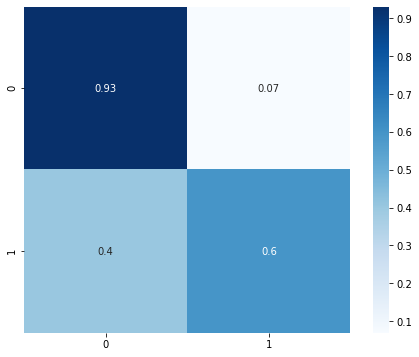

In [471]:
print('Logictics Regression\n')
start = time.time()
LR_OHE_model = LogisticRegression(C = 10000, solver='liblinear', random_state=0, max_iter=1000)
LR_OHE_model.fit(X_train, y_train)
y_pred = LR_OHE_model.predict(X_train) #Kết quả dự đoán tập test
stop = time.time()
LR_OHE_time = {stop - start}
print(f"Training time: {LR_OHE_time} s")
CM_plot(confusion_matrix(y_train, y_pred))
accuracy_score_LR_OHE = accuracy_score(y_train, y_pred)
print("accuracy score:", round(accuracy_score(y_train, y_pred), 4))
print("precision score:", round(precision_score(y_train, y_pred), 4))
print("recall score:", round(recall_score(y_train, y_pred), 4))
print("f1 score:", round(f1_score(y_train, y_pred), 4))

#### Support Vector Machine

Support Vector Machine


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Training time: {8.83204960823059} s
accuracy score: 0.8506
precision score: 0.7333
recall score: 0.5858
f1 score: 0.6513


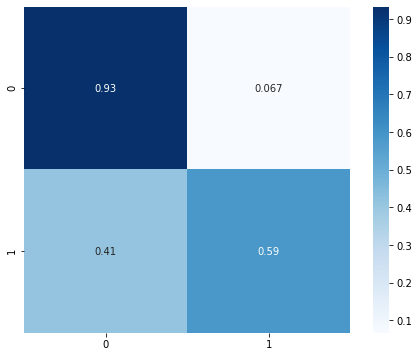

In [472]:
print('Support Vector Machine')
start = time.time()
SVM_Linear_OHE_model = Pipeline([
 ("scaler", StandardScaler()),
 ("linear_svc", LinearSVC()),
 ])
SVM_Linear_OHE_model.fit(X_train, y_train)
y_pred = SVM_Linear_OHE_model.predict(X_train)
stop = time.time()
SVM_OHE_time = {stop - start}
print(f"Training time: {SVM_OHE_time} s")
CM_plot(confusion_matrix(y_train, y_pred))
accuracy_score_SVM_Linear_OHE = accuracy_score(y_train, y_pred)
print("accuracy score:", round(accuracy_score(y_train, y_pred), 4))
print("precision score:", round(precision_score(y_train, y_pred), 4))
print("recall score:", round(recall_score(y_train, y_pred), 4))
print("f1 score:", round(f1_score(y_train, y_pred), 4))

#### RandomForestClassifier

RanDom Forest 

Training time: {9.459477186203003} s
accuracy score: 0.9996
precision score: 0.9999
recall score: 0.9985
f1 score: 0.9992


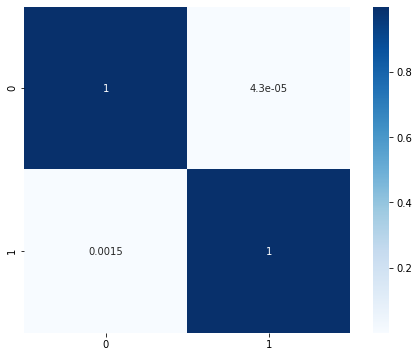

In [473]:
print('RanDom Forest \n')
start = time.time()
RF__OHE_model=RandomForestClassifier(bootstrap= True, criterion= 'gini', max_features= 'auto', n_estimators =50, n_jobs= -1)
RF__OHE_model.fit(X_train, y_train)
y_pred = RF__OHE_model.predict(X_train)
stop = time.time()
RF_OHE_time = {stop - start}
print(f"Training time: {RF_OHE_time} s")
CM_plot(confusion_matrix(y_train, y_pred))
accuracy_score_RF_OHE = accuracy_score(y_train, y_pred)
print("accuracy score:", round(accuracy_score(y_train, y_pred), 4))
print("precision score:", round(precision_score(y_train, y_pred), 4))
print("recall score:", round(recall_score(y_train, y_pred), 4))
print("f1 score:", round(f1_score(y_train, y_pred), 4))

#### DecisionTreeClassifier

Decision Tree 

Training time: {0.2208399772644043} s
accuracy score: 0.8032
precision score: 0.9877
recall score: 0.176
f1 score: 0.2988


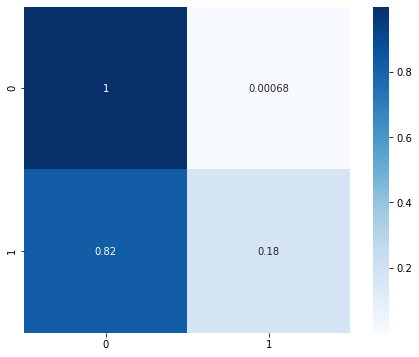

In [476]:
print('Decision Tree \n')
start = time.time()
DT_OHE_model = DecisionTreeClassifier(criterion= 'entropy', max_depth= 4, max_features= 'auto', min_samples_leaf= 2)
DT_OHE_model = DT_OHE_model.fit(X_train, y_train)
y_pred = DT_OHE_model.predict(X_train)
stop = time.time()
DT_OHE_time = {stop - start}
print(f"Training time: {DT_OHE_time} s")
CM_plot(confusion_matrix(y_train, y_pred))
accuracy_score_DT_OHE = accuracy_score(y_train, y_pred)
print("accuracy score:", round(accuracy_score(y_train, y_pred), 4))
print("precision score:", round(precision_score(y_train, y_pred), 4))
print("recall score:", round(recall_score(y_train, y_pred), 4))
print("f1 score:", round(f1_score(y_train, y_pred), 4))

##### Model Report

In [479]:
print('Các độ đo thông số của các mô hình:')
print('Support Vector Machine\nClassification Report: \n',accuracy_score_SVM_Linear_OHE)
print('======================================================')
print('LogisticRegression\nClassification Report: \n',accuracy_score_LR_OHE)
print('======================================================')
print('DecisionTreeClassifier\nClassification Report: \n',accuracy_score_DT_OHE)
print('======================================================')
print('RandomForestClassifier\nClassification Report: \n',accuracy_score_RF_OHE)

Các độ đo thông số của các mô hình:
Support Vector Machine
Classification Report: 
 0.8506288797165978
LogisticRegression
Classification Report: 
 0.8508563814228607
DecisionTreeClassifier
Classification Report: 
 0.8032435243264324
RandomForestClassifier
Classification Report: 
 0.9996099970749781


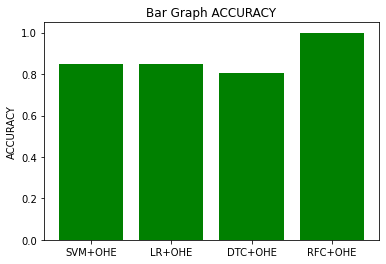

In [480]:
#in biểu đồ
BarGraph=['SVM+OHE','LR+OHE','DTC+OHE','RFC+OHE']
accuracy=[accuracy_score_SVM_Linear_OHE,accuracy_score_LR_OHE,accuracy_score_RT_OHE,accuracy_score_RF_OHE]
plt.bar(BarGraph,accuracy,color='green')
plt.title('Bar Graph ACCURACY')
plt.xlabel('')
plt.ylabel('ACCURACY')
plt.show()

In [481]:
print('Thời gian huấn luyện các mô hình:')
print('Support Vector Machine: \n','time:', SVM_OHE_time)
print('======================================================')
print('LogisticRegression : \n','time:',LR_OHE_time)
print('======================================================')
print('DecisionTreeClassifier : \n','time:',DT_OHE_time)
print('======================================================')
print('RandomForestClassifier: \n','time:',RF_OHE_time)

Thời gian huấn luyện các mô hình:
Support Vector Machine: 
 time: {8.83204960823059}
LogisticRegression : 
 time: {1.4266843795776367}
DecisionTreeClassifier : 
 time: {0.2208399772644043}
RandomForestClassifier: 
 time: {9.459477186203003}


***- Nhận xét***: 
- Sau khi sử dụng OHE để tăng chiều kích thước của dữ liệu, ta nhận thấy các độ đo của các mô hình có xu hướng tăng rõ rệt (tăng gần 5% so với khi chạy Grid Search đối với các mô hình Logistic Regression, Decision Tree, SVM). Ở mô hình Random Forest vẫn có kết quả cao nhất với độ accuracy đạt tới 99.94% và precision đạt 99.95%.
- Qua việc nhìn nhận các độ đo này của các mô hình, chúng tôi cho rằng áp dụng OHE sẽ giúp tăng độ chính xác của việc tinh chỉnh mô hình, điều này giúp kết quả dự đoán tốt hơn.
- Sau khi áp dụng chạy GridSearch và dùng feature engineering là OHE, chúng tôi thấy mô hình thuật toán Random Forest cho kết quả độ chính xác `accuracy` cao nhất với 99.94%, trong khi đó thời gian huấn luyện cho mô hình Decision Tree là thấp nhất với 0.21s.
-  Chúng tôi nhận thấy tại thời điểm hiện tại, mô hình thuật toán Random Forest (GridSearch) đang là mô hình tốt nhất với độ chính xác `accuracy` là 99.95% và thời gian huấn luyện `time` là 1.64 s.


# Chạy dữ liệu tập test

## Chạy trên mô hình có độ chính xác cao nhất

RF_OHE_model
accuracy score: 0.9996
precision score: 0.9994
recall score: 0.9991
f1 score: 0.9992


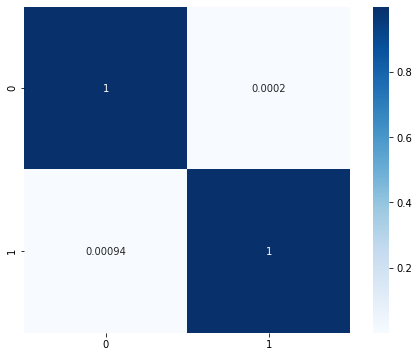

In [511]:
RF__OHE_model.fit(X_test, y_test)

y_train_pred = RF__OHE_model.predict(X_train)

RF__OHE_model.fit(X_test, y_test)

y_pred = RF__OHE_model.predict(X_test)

print('RF_OHE_model')
print("accuracy score:", round(accuracy_score(y_test, y_pred), 4))
print("precision score:", round(precision_score(y_test, y_pred), 4))
print("recall score:", round(recall_score(y_test, y_pred), 4))
print("f1 score:", round(f1_score(y_test, y_pred), 4))
CM_plot(confusion_matrix(y_test, y_pred))

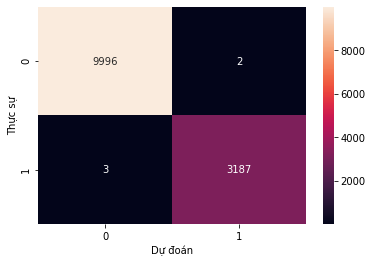

In [512]:
cm_matrix = pd.crosstab(y_test, y_pred, rownames=["Thực sự"], colnames=["Dự đoán"])
sns.heatmap(cm_matrix, annot=True, fmt="d")

RF_Grid_model
accuracy score: 0.9998
precision score: 1.0
recall score: 0.9991
f1 score: 0.9995


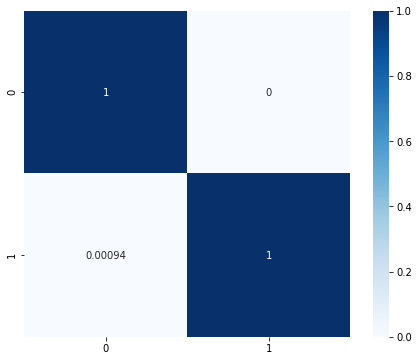

In [514]:
RF_grid_model.fit(X_test, y_test)

y_train_pred = RF_grid_model.predict(X_train)

RF_grid_model.fit(X_test, y_test)

y_pred = RF_grid_model.predict(X_test)

print('RF_Grid_model')
print("accuracy score:", round(accuracy_score(y_test, y_pred), 4))
print("precision score:", round(precision_score(y_test, y_pred), 4))
print("recall score:", round(recall_score(y_test, y_pred), 4))
print("f1 score:", round(f1_score(y_test, y_pred), 4))
CM_plot(confusion_matrix(y_test, y_pred))

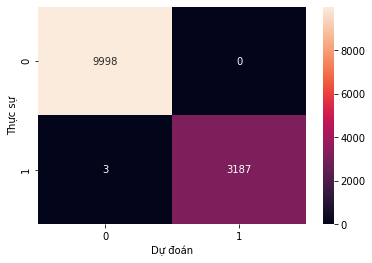

In [515]:
cm_matrix = pd.crosstab(y_test, y_pred, rownames=["Thực sự"], colnames=["Dự đoán"])
sns.heatmap(cm_matrix, annot=True, fmt="d")

***- Nhận xét***: 
- Sử dụng tập test để đánh giá mô hình cho ra kết quả tốt.
- Ta thấy kết quả sử dụng mô hình RF + Grid Search để kiểm tra trên tập test có kết quả tốt nhất trong tất cả 16 mô hình đã huấn luyện. Cụ thể độ chính xác của mô hình này là (accuracy = 99.98% và precision = 100%).